In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()
x = iris['data'][:, (2, 3)]  # petal length, petal width
y = iris['target']
setosa_or_versicolor = (y == 0) | (y == 1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(f"x.shape = {x.shape}, y.shape = {y.shape}")

x.shape = (100, 2), y.shape = (100,)


In [3]:
def plot_decision_boundary(svm_clf, x, y, axis):
    plt.figure(figsize=(8, 4))
    plt.scatter(x[y == 0, 0], x[y == 0, 1], label="0")
    plt.scatter(x[y == 1, 0], x[y == 1, 1], label="1")

    vectors = svm_clf.support_vectors_
    plt.scatter(vectors[:, 0], vectors[:, 1], s=180, c='silver', zorder=0)

    w, b = svm_clf.coef_[0], svm_clf.intercept_[0]
    x0 = np.linspace(axis[0], axis[1], 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, 'k')
    plt.plot(x0, gutter_up, 'k--')
    plt.plot(x0, gutter_down, 'k--')
    plt.axis(axis)
    plt.legend()

In [4]:
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(x, y)

SVC(C=inf, kernel='linear')

In [5]:
print(f"svm_clf.coef_ = {svm_clf.coef_}")
print(f"svm_clf.intercept_ = {svm_clf.intercept_}")
print(f"svm_clf.support_vectors_ = \n{svm_clf.support_vectors_}")

svm_clf.coef_ = [[1.29411744 0.82352928]]
svm_clf.intercept_ = [-3.78823471]
svm_clf.support_vectors_ = 
[[1.9 0.4]
 [3.  1.1]]


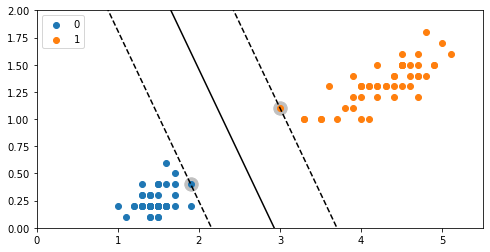

In [6]:
plot_decision_boundary(svm_clf, x, y, [0, 5.5, 0, 2])